# Pendahuluan

Covid19 adalah pandemi yang sudah mewabah ke seluruh dunia. Sebagian besar negara-negara di dunia sudah terjangkit. Penanganan tiap-tiap negara pun berbeda, sesuai dengan kebijakan pemerintah. 

Hal ini mengakibatkan perbedaan trend kenaikan atau penurunan kasus covid berbeda-beda tiap negara.
Pada kasus kali ini, kita akan mencoba menggali data covid19 dari salah satu open api yang tersedia yaitu https://covid19-api.org/.


# Library yang dibutuhkan

Pertama-tama, import terlebih dahulu library yang dibutuhkan secara berurutan, yaitu
- numpy
- pandas


In [63]:
import numpy as np
import pandas as pd

# Membaca Data COVID-19 Dunia

Gunakan method .read_json() pada library pandas yang sidah diimport tadi. Alamat url file yang akan diimport ini ada di: https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json.

Kemudian, ceklah ukuran dataset, 5 data teratas, dan 5 data terbawah.


In [64]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)

print("Ukuran dataset: %d kolom dan %d baris.\n" % df_covid_worldwide.shape)
print("Lima data teratas:\n", df_covid_worldwide.head())
print("\nLima data terbawah:\n", df_covid_worldwide.tail())


Ukuran dataset: 61900 kolom dan 6 baris.

Lima data teratas:
         date  daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
0 2020-03-20                      1             0                1       0   
1 2020-03-21                      0             0                1       0   
2 2020-03-22                      1             0                2       0   
3 2020-03-23                      0             0                2       0   
4 2020-03-24                      0             0                2       0   

  geo_id  
0     TD  
1     TD  
2     TD  
3     TD  
4     TD  

Lima data terbawah:
             date  daily_confirmed_cases  daily_deaths  confirmed_cases  \
61895 2020-02-24                     57             1              691   
61896 2020-02-26                      0             1              691   
61897 2020-03-10                     -9             1              696   
61898 2020-02-20                     79             2              621   
61899 2020-

# Reformat Data Frame COVID-19 Dunia

Dari hasil sebelumnya terlihat bahwa data frame df_covid_worldwide memiliki kolom yang berhubungan dengan tanggal (kolom date). 

Cek terlebih dahulu tipe data seluruh kolom pada data frame df_covid_worldwide ini. Menggunakan .dtypes atau .info(). 

Untuk pengerjaan kasus ini akan digunakan method .info().

Setelah tipe data di setiap kolomnya dicek dan kolom date juga sudah bertipe numpy.datetime64[ns] 

maka kolom ini dapat diset sebagai index untuk data frame df_covid_worldwide ini, menggunakan method .set_index. 

Setelah itu df_covid_worldwide diurutkan berdasarkan indeknya menggunakan .set_index, lakukan dengan menggunakan teknik chaining di pandas.

Kemudian cek kembali info dataframe yang telah diubah ini.


In [65]:
print("Informasi data frame awal:")
df_covid_worldwide.info()

df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index()

print("\nInformasi data frame setelah set index kolom date:")
df_covid_worldwide.info()


Informasi data frame awal:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61900 entries, 0 to 61899
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   61900 non-null  datetime64[ns]
 1   daily_confirmed_cases  61900 non-null  int64         
 2   daily_deaths           61900 non-null  int64         
 3   confirmed_cases        61900 non-null  int64         
 4   deaths                 61900 non-null  int64         
 5   geo_id                 61625 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.3+ MB

Informasi data frame setelah set index kolom date:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61900 entries, 2019-12-31 to 2020-12-14
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   daily_confirmed_cases  61900 non-null  i

# Missing Value di DataFrame COVID-19 Dunia

Hasil sebelumnya dengan ada kolom dengan missing value, cobalah inspeksi seluruh kolom apakah ada yang memiliki missing value!

Wah, ternyata kolom geo_id memiliki missing value sebanyak 275 butir data dari total 61900 baris data yang dimiliki. 

Kolom geo_id ini akan digabungkan dengan satu dataset lagi sehingga dapat ditentukan negaranya melalui nama negaranya bukan dengan geo_id negara.

Buanglah baris data yang memiliki missing value ini. 


In [66]:
print("Jumlah missing value tiap kolom:")
print(df_covid_worldwide.isna().sum())

df_covid_worldwide.dropna(inplace=True)

print("\nJumlah missing value tiap kolom setelah didrop:")
print(df_covid_worldwide.isna().sum())


Jumlah missing value tiap kolom:
daily_confirmed_cases      0
daily_deaths               0
confirmed_cases            0
deaths                     0
geo_id                   275
dtype: int64

Jumlah missing value tiap kolom setelah didrop:
daily_confirmed_cases    0
daily_deaths             0
confirmed_cases          0
deaths                   0
geo_id                   0
dtype: int64


# Membaca Data Countries

Bacalah dataset countries melalui alamat url https://storage.googleapis.com/dqlab-dataset/country_details.json yang ditempatkan ke variabel df_countries. 

Lalu inspeksilah dataset dengan mencetak lima data teratas dari dataframe countries (df_countries).
Apa yang dapat kamu simpulkan dari kedua dataset ini?


In [67]:
countries_url = "https://storage.googleapis.com/dqlab-dataset/country_details.json"
df_countries = pd.read_json(countries_url)
print(df_countries.head())

  geo_id country_name
0     TD         Chad
1     CU         Cuba
2     FJ         Fiji
3     GU         Guam
4     IR         Iran


# Merge Covid19 Data dan Countries

Selanjutnya adalah mapping data covid19 dan data country. Gunakan fungsi .merge pada pandas untuk menggabungkan df_covid_worldwide dan df_countries. 

Untuk merge, gunakan kolom geo_id, (df_covid_worldwide memiliki index pada kolom date untuk itu perlu .reset_index()). 

Setelah merge dapat diset kembali index ke kolom date.

Lalu print sample data dengan menggunakan head().


In [68]:
df_covid_worldwide = df_covid_worldwide.reset_index()

In [69]:
df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")
print(df_covid_denormalized.head())

            index  daily_confirmed_cases  daily_deaths  confirmed_cases  \
date                                                                      
2019-12-31      0                      0             0                0   
2020-01-01     69                      0             0                0   
2020-01-02    168                      0             0                0   
2020-01-03    212                      0             0                0   
2020-01-04    302                      0             0                0   

            deaths geo_id country_name  
date                                    
2019-12-31       0     IN        India  
2020-01-01       0     IN        India  
2020-01-02       0     IN        India  
2020-01-03       0     IN        India  
2020-01-04       0     IN        India  


# Menghitung Fatality Ratio

Menambahkan satu kolom tambahan yaitu fatality_ratio, yang merupakan pembagian antara kolom deaths dan confirmed_cases.


In [70]:
df_covid_denormalized["fatality_ratio"] = df_covid_denormalized["deaths"]/df_covid_denormalized["confirmed_cases"]
print(df_covid_denormalized.head())


            index  daily_confirmed_cases  daily_deaths  confirmed_cases  \
date                                                                      
2019-12-31      0                      0             0                0   
2020-01-01     69                      0             0                0   
2020-01-02    168                      0             0                0   
2020-01-03    212                      0             0                0   
2020-01-04    302                      0             0                0   

            deaths geo_id country_name  fatality_ratio  
date                                                    
2019-12-31       0     IN        India             NaN  
2020-01-01       0     IN        India             NaN  
2020-01-02       0     IN        India             NaN  
2020-01-03       0     IN        India             NaN  
2020-01-04       0     IN        India             NaN  


# Negara-negara dengan Fatality Ratio Tertinggi

Ambil top 20 negara dengan value kolom fatality_ratio tertinggi dengan menggunakan fungsi sort_values.

In [71]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values("fatality_ratio", ascending=False).head(20)
print(df_top_20_fatality_rate[["geo_id","country_name","fatality_ratio"]])


           geo_id country_name  fatality_ratio
date                                          
2020-03-15     SD        Sudan             1.0
2020-02-20     IR         Iran             1.0
2020-03-16     GT    Guatemala             1.0
2020-03-13     GY       Guyana             1.0
2020-03-18     SD        Sudan             1.0
2020-03-17     SD        Sudan             1.0
2020-03-16     SD        Sudan             1.0
2020-02-03     PH  Philippines             0.5
2020-02-05     PH  Philippines             0.5
2020-02-04     PH  Philippines             0.5
2020-03-28     NI    Nicaragua             0.5
2020-02-02     PH  Philippines             0.5
2020-03-24     ZW     Zimbabwe             0.5
2020-03-24     GM       Gambia             0.5
2020-03-19     SD        Sudan             0.5
2020-03-20     SD        Sudan             0.5
2020-03-21     SD        Sudan             0.5
2020-03-22     SD        Sudan             0.5
2020-03-23     SD        Sudan             0.5
2020-03-24   

# Kondisi Fatality ratio Tertinggi di Bulan Agustus 2020

Ya, berikut tanggal kemunculan berulang negara-negara dengan 20 besar fatality ratio tertinggi

Untuk itu dapat mengakses fatality rate yang terjadi pada bulan Agustus saja dan kemudian 20 negara dengan fatality rate tertinggi akan diurutkan. Untuk itu bagaimanakah caranya?
- Sebelum dihitung fatality_rate nya kita ambil dahulu kasus pada bulan Agustus 2020 menggunakan .loc. Setelah itu kamu dapat melakukan pengelompokkan menggunakan .groupby berdasarkan negara (kolom country_name) dan menghitung jumlahnya selama bulan Agustus 2020 ini menggunakan .sum.

- Buatlah kolom baru fatality_ratio untuk mengitung rasio kefatalan di bulan Agustus 2020 seperti yang telah dikerjakan sebelumnya, dan jangan lupa urutkan 20 negara dengan fatality ratio tertinggi.



In [72]:
df_covid_denormalized_august = df_covid_denormalized.loc["2020-08"].groupby("country_name").sum()

df_covid_denormalized_august["fatality_ratio"] = df_covid_denormalized_august["deaths"]/df_covid_denormalized_august["confirmed_cases"]

df_top_20_fatality_rate_on_august = df_covid_denormalized_august.sort_values(by="fatality_ratio", ascending=False).head(20)
print(df_top_20_fatality_rate_on_august["fatality_ratio"])


country_name
Yemen                     0.286473
Italy                     0.138619
France                    0.137979
United_Kingdom            0.130228
Belgium                   0.125079
Hungary                   0.122820
Netherlands               0.099309
Mexico                    0.099092
Jersey                    0.088677
Spain                     0.079746
Chad                      0.078870
Montserrat                0.076923
Canada                    0.073963
Sweden                    0.071475
Isle_of_Man               0.071429
British_Virgin_Islands    0.066239
Ireland                   0.065030
Sudan                     0.064250
Liberia                   0.063944
Ecuador                   0.061031
Name: fatality_ratio, dtype: float64


# Visualisasi Negara dengan Fatality Ratio Tertinggi di Bulan Agustus 2020

Untuk memvisualisasikan negara-negara dengan kasus fatality rate tertinggi akibat covid-19 ini dapat dilakukan dengan menggunakan bar chart, tepatnya horizontal bar chart.  

Dengan memilih kolom fatality_ratio pada data frame df_top_20_fatality_rate_on_august terapkanlah method-method berikut secara chaining mulai dari pengurutan dengan .sort_values, plot dengan .plot menggunakan keyword argument kind="barh".


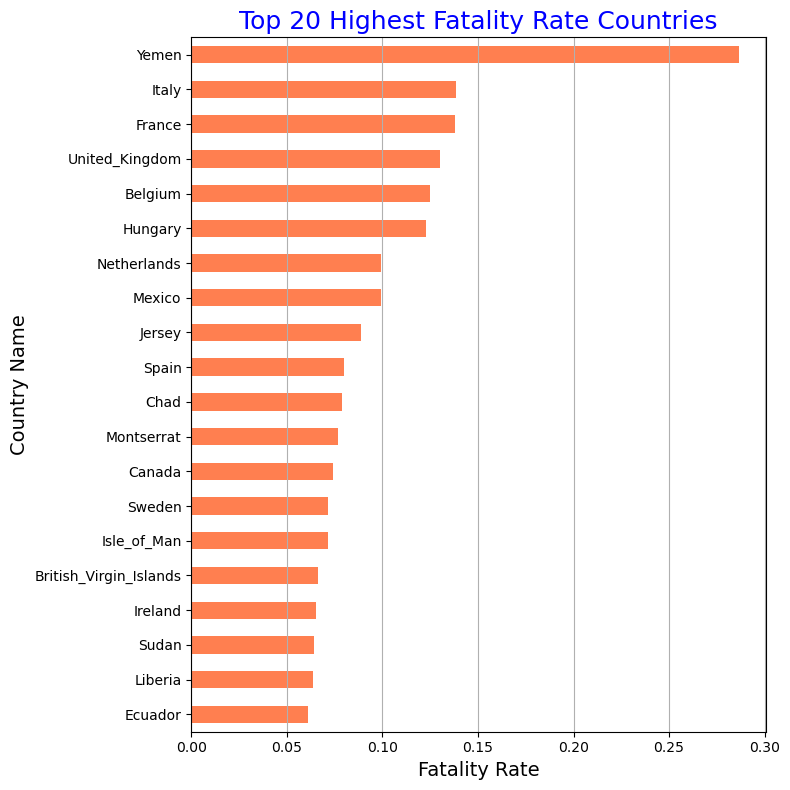

In [73]:
# Visulisasi
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
df_top_20_fatality_rate_on_august["fatality_ratio"].sort_values().plot(kind="barh", color="coral")
plt.title("Top 20 Highest Fatality Rate Countries", fontsize=18, color="b")
plt.xlabel("Fatality Rate", fontsize=14)
plt.ylabel("Country Name", fontsize=14)
plt.grid(axis="x")
plt.tight_layout()
plt.show()


# Data Frame Kasus COVID-19 ASEAN

Selanjutnya adalah membandingkan kasus covid19 di Indonesia (ID) dengan negara-negara tetangga, yaitu:
- MY -> Malaysia,
- SG -> Singapore,
- TH -> Thailand,
- VN -> Vietnam.

Ambillah kelima negara melalui variabel data frame df_covid_denormalized dengan menerapkan memilih kolomnya. Menggunakan list comprehension untuk mempersingkat perulangan. Hasil proses komparasi kolom geo_id data frame df_covid_denormalized dengan list asean_country_id yang berisi ["ID", "MY", "SG", "TH", "VN"] di konversikan ke numpy array menggunakan .to_numpy. Hasil ini ditempatkan ke  variabel filter_list.

Setelah itu buat variabel filter_array yang berisi stack filter_list berdasarkan kolom mengunakan np.column_stack, jumlah berdasarkan axis=1 dan set keyword argument lainnya yaitu dtypes="bool".
Digunakan .sum dengan keyword argument axis=1 dan dtypes="bool" 

Langkah terakhir mengambil subset data frame df_covid_denormalized dengan nama df_covid_denormalized_asean menggunakan filter_array.


In [74]:
asean_country_id = ["ID", "MY", "SG", "TH", "VN"]
filter_list = [(df_covid_denormalized["geo_id"]==country_id).to_numpy() for country_id in asean_country_id]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")
df_covid_denormalized_asean = df_covid_denormalized[filter_array].sort_index()

print("Cek nilai unik di kolom 'country_name':", df_covid_denormalized_asean["country_name"].unique())
print(df_covid_denormalized_asean.head())


Cek nilai unik di kolom 'country_name': ['Malaysia' 'Vietnam' 'Thailand' 'Singapore' 'Indonesia']
            index  daily_confirmed_cases  daily_deaths  confirmed_cases  \
date                                                                      
2019-12-31      9                      0             0                0   
2019-12-31     62                      0             0                0   
2019-12-31     50                      0             0                0   
2019-12-31     46                      0             0                0   
2019-12-31     34                      0             0                0   

            deaths geo_id country_name  fatality_ratio  
date                                                    
2019-12-31       0     MY     Malaysia             NaN  
2019-12-31       0     VN      Vietnam             NaN  
2019-12-31       0     TH     Thailand             NaN  
2019-12-31       0     SG    Singapore             NaN  
2019-12-31       0     ID    Indon

# Kapankah Kasus Pertama COVID-19 di ASEAN

Sekarang kita akan cek kapankah kasus pertama COVID-19 di masing-masing lima negara ASEAN ini terjadi? 

Kamu dapat menggunakan kolom confirmed_case untuk mengecek kemunculan kasus pertama yang terkonfirmasi.


In [75]:
print("The first case popped up in each of 5 ASEAN countries:")
for country_id in asean_country_id:
    asean_country = df_covid_denormalized_asean[df_covid_denormalized_asean["geo_id"]==country_id]
    first_case = asean_country[asean_country["confirmed_cases"]>0][["confirmed_cases","geo_id","country_name"]]
    print(first_case.head(1))


The first case popped up in each of 5 ASEAN countries:
            confirmed_cases geo_id country_name
date                                           
2020-03-02                2     ID    Indonesia
            confirmed_cases geo_id country_name
date                                           
2020-01-25                3     MY     Malaysia
            confirmed_cases geo_id country_name
date                                           
2020-01-24                3     SG    Singapore
            confirmed_cases geo_id country_name
date                                           
2020-01-13                1     TH     Thailand
            confirmed_cases geo_id country_name
date                                           
2020-01-24                2     VN      Vietnam


# Kasus Covid-19 di ASEAN mulai Bulan Maret 2020

Filter kolom date dari data df_covid_denormalized_asean sehingga hanya data dari tanggal 1 Maret 2020 sampai tanggal terakhir di data frame yang diambil. 

Komparasikan index df_covid_denormalized_asean dengan tanggal yang dimaksud.


In [76]:
df_covid_denormalized_asean_march_onward = df_covid_denormalized_asean[df_covid_denormalized_asean.index>="2020-03-01"]
print(df_covid_denormalized_asean_march_onward.head())


            index  daily_confirmed_cases  daily_deaths  confirmed_cases  \
date                                                                      
2020-03-01   4108                      0             1               42   
2020-03-01   4152                      4             0              102   
2020-03-01   4122                      0             0               16   
2020-03-01   4138                      0             0                0   
2020-03-01   4087                      0             0               25   

            deaths geo_id country_name  fatality_ratio  
date                                                    
2020-03-01       1     TH     Thailand         0.02381  
2020-03-01       0     SG    Singapore         0.00000  
2020-03-01       0     VN      Vietnam         0.00000  
2020-03-01       0     ID    Indonesia             NaN  
2020-03-01       0     MY     Malaysia         0.00000  


# Visualisasi Kasus COVID-19 di ASEAN

Untuk visualisasi kali ini menggunakan seaborn lineplot untuk menampilkan perbandingan kasus di lima negara ASEAN mulai per 1 Maret 2020. 

Menggunakan keyword argument data yaitu df_covid_denormalized_asean_march_onward, x yaitu index data frame df_covid_denormalized_asean_march_onward, y yaitu kolom confirmed_cases, dan hue yaitu kolom country_name.


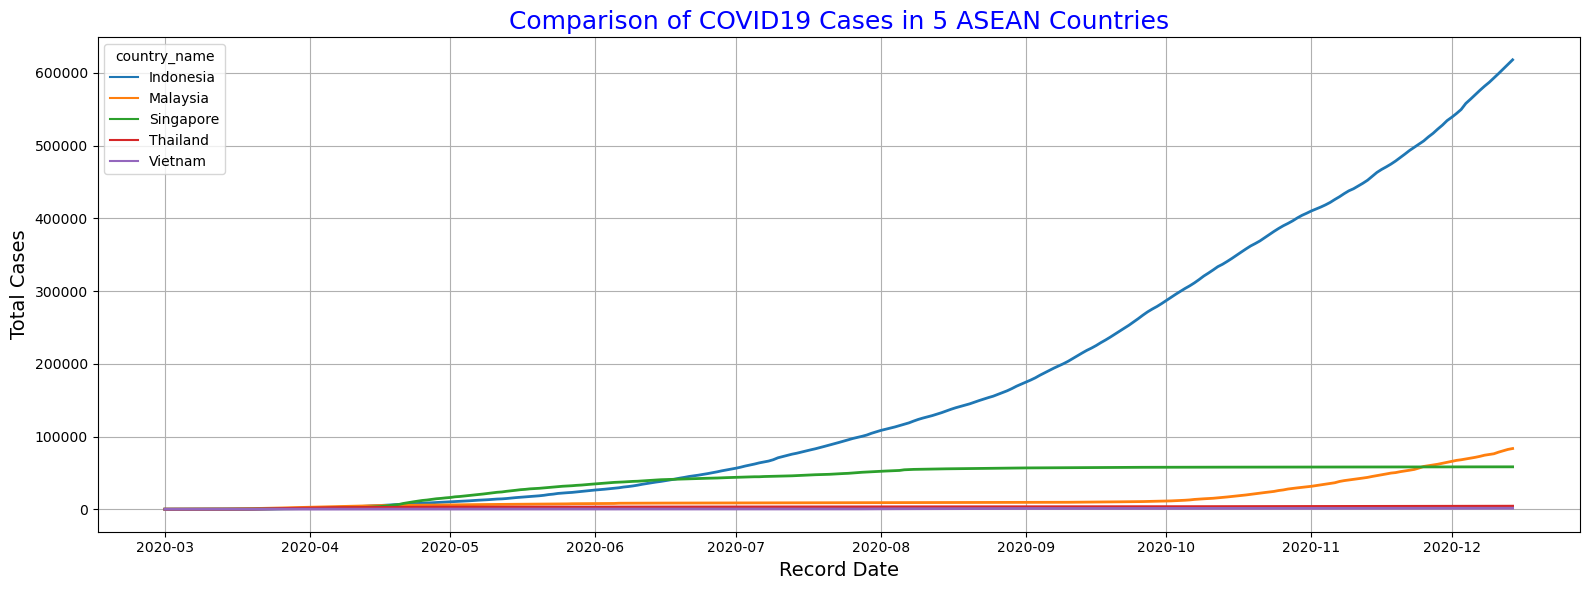

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming you want to take the mean of 'confirmed_cases' for duplicate index labels
df_covid_agg = df_covid_denormalized_asean_march_onward.groupby(['date', 'country_name']).mean().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(data=df_covid_agg,
             x='date',
             y='confirmed_cases',
             hue='country_name',
             linewidth=2)
plt.xlabel('Record Date', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.title('Comparison of COVID19 Cases in 5 ASEAN Countries', color="b", fontsize=18)
plt.grid()
plt.tight_layout()
plt.show()